In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, make_scorer,classification_report
import time

In [4]:
df = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
df = df.drop(['Product ID', 'RNF'], axis=1)
test = test.drop(['Product ID', 'RNF'], axis=1)
df = pd.get_dummies(df, columns=['Type'], drop_first=True)
test = pd.get_dummies(test, columns=['Type'], drop_first=True)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,Type_L,Type_M
id,,,,,,,,,,,,
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1


In [18]:
# X_train = df.drop('Machine failure', axis=1)
# y_train = df['Machine failure']
# start_time = time.time()
# cv = KFold(n_splits=3, shuffle=True, random_state=42)
# rf = RandomForestClassifier()
# param_dist = {
# 'n_estimators': np.arange(10, 200, 10),
# 'max_depth': np.arange(1, 20),
# 'min_samples_split': np.arange(2, 20),
# 'min_samples_leaf': np.arange(1, 20),
# 'bootstrap': [True, False]
# }
# random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=cv, scoring=make_scorer(roc_auc_score), n_jobs=-1)
# random_search.fit(X_train, y_train)
# print('Training completed in {} minutes'.format(round((time.time() - start_time)/60, 2)))
# random_search.best_params_
# random_search.best_score_

Training completed in 3.18 minutes


0.8821213620284477

In [19]:
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_train)
# print('Classification Report:')
# print(classification_report(y_train, y_pred))

# accuracy = accuracy_score(y_train, y_pred)
# print('accuracy_score:')
# print(accuracy)
# precision = precision_score(y_train, y_pred)
# print('precision_score:')
# print(precision)
# recall = recall_score(y_train, y_pred)
# print('recall_score:')
# print(recall)
# f1 = f1_score(y_train, y_pred)
# print('f1_score:')
# print(f1)
# cm = confusion_matrix(y_train, y_pred)
# print('Confusion Matrix:')
# print(cm)
# roc_auc = roc_auc_score(y_train, y_pred)
# print('ROC AUC Score:', roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    134281
           1       0.99      0.77      0.87      2148

    accuracy                           1.00    136429
   macro avg       0.99      0.88      0.93    136429
weighted avg       1.00      1.00      1.00    136429

accuracy_score:
0.9962398023880553
precision_score:
0.9921733895243829
recall_score:
0.7672253258845437
f1_score:
0.8653189813599369
Confusion Matrix:
[[134268     13]
 [   500   1648]]
ROC AUC Score: 0.8835642569875947


In [49]:
X_train = df.drop('Machine failure', axis=1)
y_train = df['Machine failure']
start_time = time.time()
cv = KFold(n_splits=4, shuffle=True, random_state=42)
rf = RandomForestClassifier()
param_dist = {
'n_estimators': np.arange(10, 200, 10),
'max_depth': np.arange(1, 20),
'min_samples_split': np.arange(2, 20),
'min_samples_leaf': np.arange(1, 20),
'bootstrap': [True, False]
}
start_time = time.time()
rf_balanced = RandomForestClassifier(class_weight='balanced')
random_search_balanced = RandomizedSearchCV(rf_balanced, param_distributions=param_dist, n_iter=30, cv=cv, scoring=make_scorer(roc_auc_score), n_jobs=-1)
random_search_balanced.fit(X_train, y_train)
print('Training completed in {} minutes'.format(round((time.time() - start_time)/60, 2)))

Training completed in 6.13 minutes


In [50]:
random_search_balanced.best_params_

{'n_estimators': 180,
 'min_samples_split': 7,
 'min_samples_leaf': 19,
 'max_depth': 8,
 'bootstrap': True}

In [51]:
random_search_balanced.best_score_

0.9119779854414009

In [52]:
best_rf_balanced = random_search_balanced.best_estimator_
y_pred_balanced = best_rf_balanced.predict(X_train)
print('Classification Report:')
print(classification_report(y_train, y_pred_balanced))

accuracy = accuracy_score(y_train, y_pred_balanced)
print('accuracy_score:')
print(accuracy)
precision = precision_score(y_train, y_pred_balanced)
print('precision_score:')
print(precision)
recall = recall_score(y_train, y_pred_balanced)
print('recall_score:')
print(recall)
f1 = f1_score(y_train, y_pred_balanced)
print('f1_score:')
print(f1)
cm = confusion_matrix(y_train, y_pred_balanced)
print('Confusion Matrix:')
print(cm)
roc_auc_balanced = roc_auc_score(y_train, y_pred_balanced)
print('ROC AUC Score:', roc_auc_balanced)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    134281
           1       0.28      0.88      0.42      2148

    accuracy                           0.96    136429
   macro avg       0.64      0.92      0.70    136429
weighted avg       0.99      0.96      0.97    136429

accuracy_score:
0.9620242030653307
precision_score:
0.277932347342217
recall_score:
0.8836126629422719
f1_score:
0.422858415951877
Confusion Matrix:
[[129350   4931]
 [   250   1898]]
ROC AUC Score: 0.9234455805086023


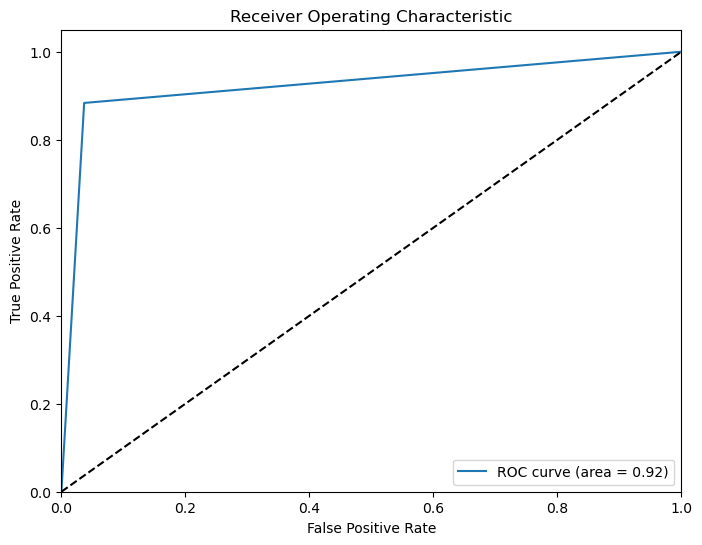

In [53]:
fpr_balanced, tpr_balanced, _ = roc_curve(y_train, y_pred_balanced)
plt.figure(figsize=(8, 6))
plt.plot(fpr_balanced, tpr_balanced, label='ROC curve (area = %0.2f)' % roc_auc_balanced)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()